In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Download latest version
csv_path_esg = "/Users/willevans/Desktop/sp500_esg_data.csv"
csv_path_price = "/Users/willevans/Desktop/sp500_price_data.csv"

df_esg = pd.read_csv(csv_path_esg)
df_price = pd.read_csv(csv_path_price)

print(df_price.columns)
print(df_esg.head(3))

Index(['Date', 'A', 'AAL', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WRB', 'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZTS'],
      dtype='object', length=427)
  Symbol                Full Name             GICS Sector  \
0      A     Agilent Technologies             Health Care   
1    AAL  American Airlines Group             Industrials   
2   AAPL               Apple Inc.  Information Technology   

                            GICS Sub-Industry  environmentScore  socialScore  \
0              Life Sciences Tools & Services              1.12         6.42   
1                          Passenger Airlines              9.94        11.65   
2  Technology Hardware, Storage & Peripherals              0.46         7.39   

   governanceScore  totalEsg  highestControversy  percentile  ratingYear  \
0             6.10     13.64                 2.0        7.98      2023.0   
1             4.76     26.35                 2.0       54.48      2023.0   
2  

In [2]:
# Convert Date column to datetime
df_price['Date'] = pd.to_datetime(df_price['Date'])
# Melt the price data to long format
price_long_df = df_price.melt(id_vars=['Date'], var_name='Symbol', value_name='Price')

# Merge ESG and Price data
merged_df = df_esg.merge(price_long_df, on='Symbol', how='inner')

print(merged_df.head(1))

# Summary statistics
df_esg.describe()

  Symbol             Full Name  GICS Sector               GICS Sub-Industry  \
0      A  Agilent Technologies  Health Care  Life Sciences Tools & Services   

   environmentScore  socialScore  governanceScore  totalEsg  \
0              1.12         6.42              6.1     13.64   

   highestControversy  percentile  ratingYear  ratingMonth    marketCap  \
0                 2.0        7.98      2023.0          9.0  39751831552   

    beta  overallRisk                      Date       Price  
0  1.054            8 2023-01-03 00:00:00+00:00  150.039993  


,environmentScore,socialScore,governanceScore,totalEsg,highestControversy,percentile,ratingYear,ratingMonth,marketCap,beta,overallRisk
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,4.260000e+02,426.000000,426.000000
mean,5.784343,9.071009,6.701009,21.556150,1.882629,35.766150,2022.978873,8.960094,1.094058e+11,1.035941,5.286385
std,5.091763,3.663293,2.165417,6.898711,0.910244,24.307081,0.198878,0.455868,3.112613e+11,0.416299,2.829700
min,0.000000,0.760000,2.960000,7.080000,0.000000,1.270000,2021.000000,3.000000,6.389306e+09,-0.057000,1.000000
25%,1.780000,6.662500,5.252500,16.410000,1.000000,15.322500,2023.000000,9.000000,2.054353e+10,0.749250,3.000000
50%,4.085000,8.905000,6.085000,21.070000,2.000000,32.150000,2023.000000,9.000000,4.029131e+10,1.029500,5.000000
75%,8.992500,11.212500,7.637500,26.020000,2.000000,53.227500,2023.000000,9.000000,8.615946e+10,1.280500,8.000000
max,24.980000,22.480000,19.430000,41.660000,5.000000,93.230000,2023.000000,9.000000,3.296097e+12,3.243000,10.000000


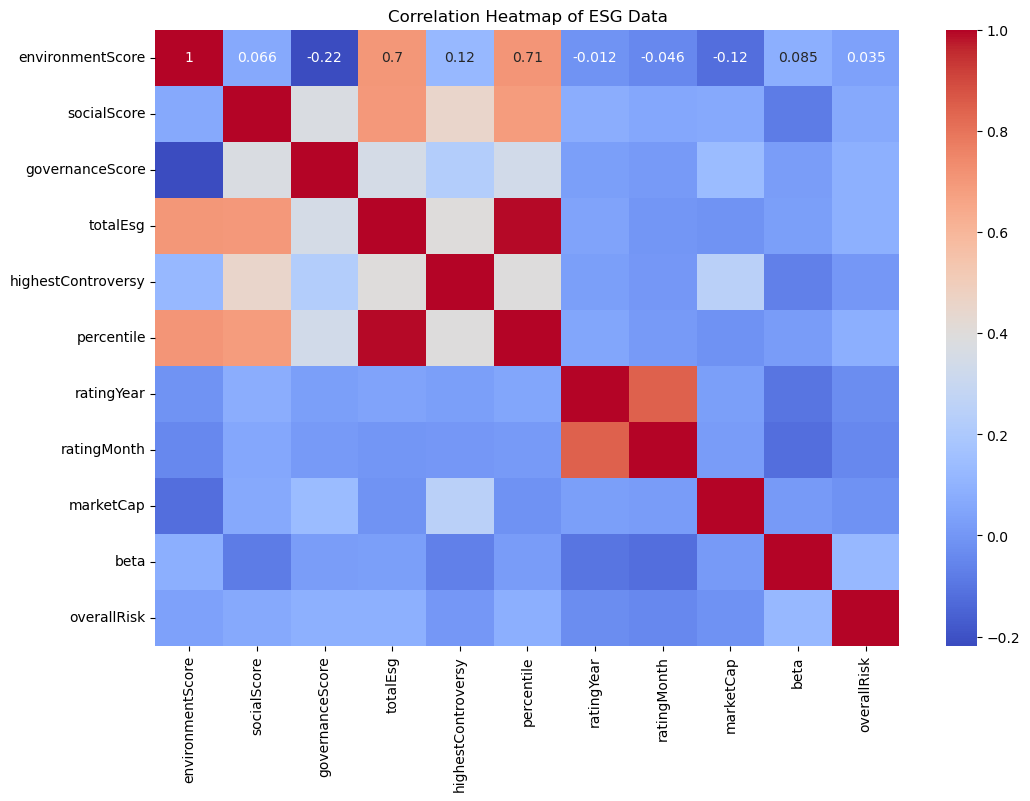

In [3]:
# Correlation heatmap for ESG data
numeric_df = df_esg.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of ESG Data')
plt.show()

In [4]:
# Prepare data for prediction
X = df_esg[['environmentScore', 'socialScore', 'governanceScore', 'totalEsg','highestControversy']]
y = df_esg['marketCap']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(2.450690065210433e+23, 0.046079885552757216)

In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred) 
print("R-Squared:", r2)

MSE: 2.6403331711519856e+23
R-Squared: -0.027737842723854822


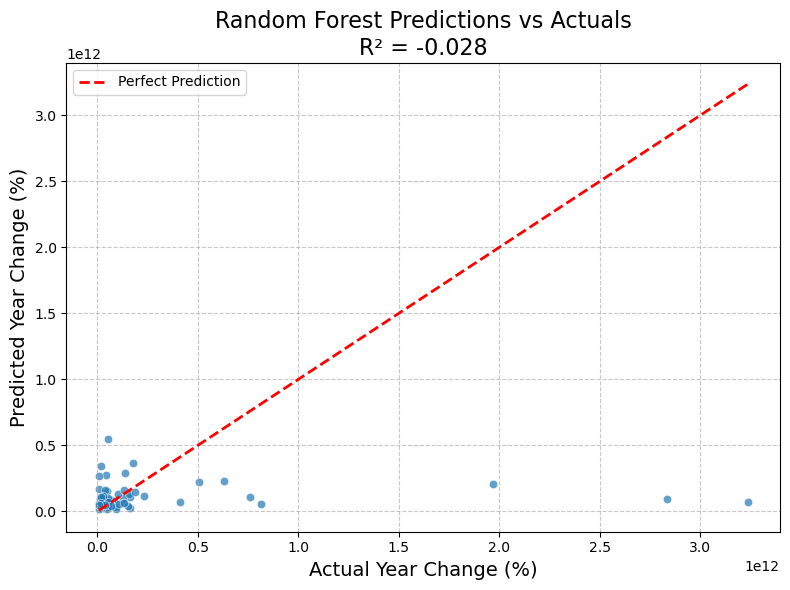

In [6]:

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label="Perfect Prediction")

plt.title(f"Random Forest Predictions vs Actuals\nR² = {r2:.3f}", fontsize=16)
plt.xlabel("Actual Year Change (%)", fontsize=14)
plt.ylabel("Predicted Year Change (%)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


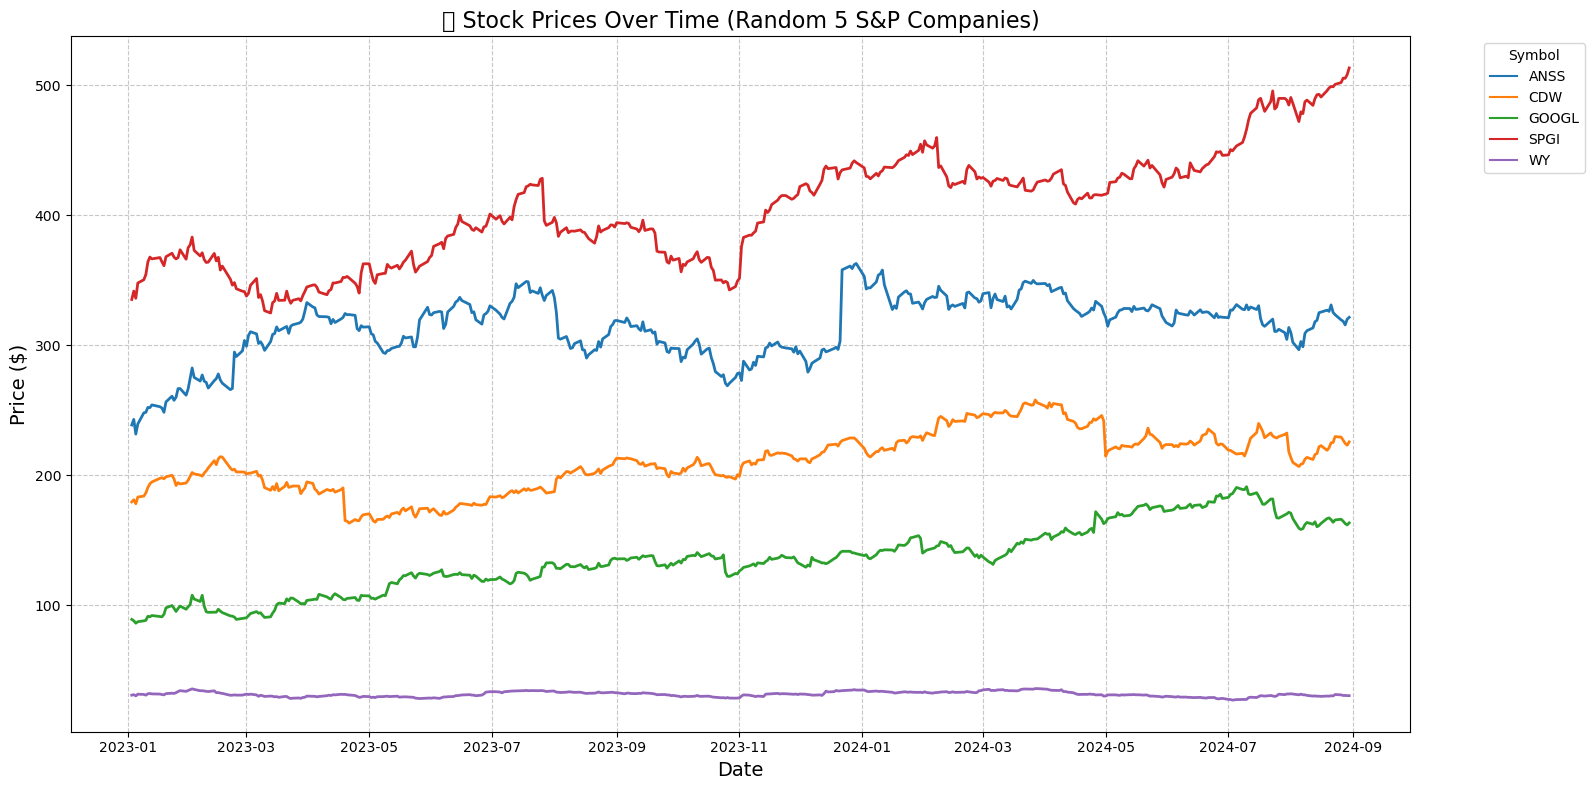

In [7]:
# Pick 5 random symbols
symbols_sample = merged_df['Symbol'].drop_duplicates().sample(5, random_state=42)

# Filter merged_df for only those 5
df_sample = merged_df[merged_df['Symbol'].isin(symbols_sample)]

# Plot
plt.figure(figsize=(16,8))
sns.lineplot(data=df_sample, x="Date", y="Price", hue="Symbol", linewidth=2)

# Labels and formatting
plt.title("📈 Stock Prices Over Time (Random 5 S&P Companies)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)
plt.legend(title="Symbol", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
# Remove any existing "Year Change (%)" column in df_esg
if "Year Change (%)" in df_esg.columns:
    df_esg = df_esg.drop(columns=["Year Change (%)"])

# Ensure Date is datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Get SOY & EOY prices for each Symbol
soy_eoy = merged_df.groupby('Symbol').agg(
    SOY=('Price', 'first'),
    EOY=('Price', 'last')
).reset_index()

# Calculate yearly percentage change
soy_eoy['Year Change (%)'] = ((soy_eoy['EOY'] - soy_eoy['SOY']) / soy_eoy['SOY']) * 100

# Merge with ESG data
df_esg = df_esg.merge(soy_eoy[['Symbol', 'Year Change (%)']], on='Symbol', how='left')

# Preview updated ESG dataframe
print(df_esg.head())

  Symbol                Full Name             GICS Sector  \
0      A     Agilent Technologies             Health Care   
1    AAL  American Airlines Group             Industrials   
2   AAPL               Apple Inc.  Information Technology   
3   ABBV                   AbbVie             Health Care   
4    ABT      Abbott Laboratories             Health Care   

                            GICS Sub-Industry  environmentScore  socialScore  \
0              Life Sciences Tools & Services              1.12         6.42   
1                          Passenger Airlines              9.94        11.65   
2  Technology Hardware, Storage & Peripherals              0.46         7.39   
3                               Biotechnology              2.38        17.19   
4                       Health Care Equipment              2.27        14.24   

   governanceScore  totalEsg  highestControversy  percentile  ratingYear  \
0             6.10     13.64                 2.0        7.98      2023.0   


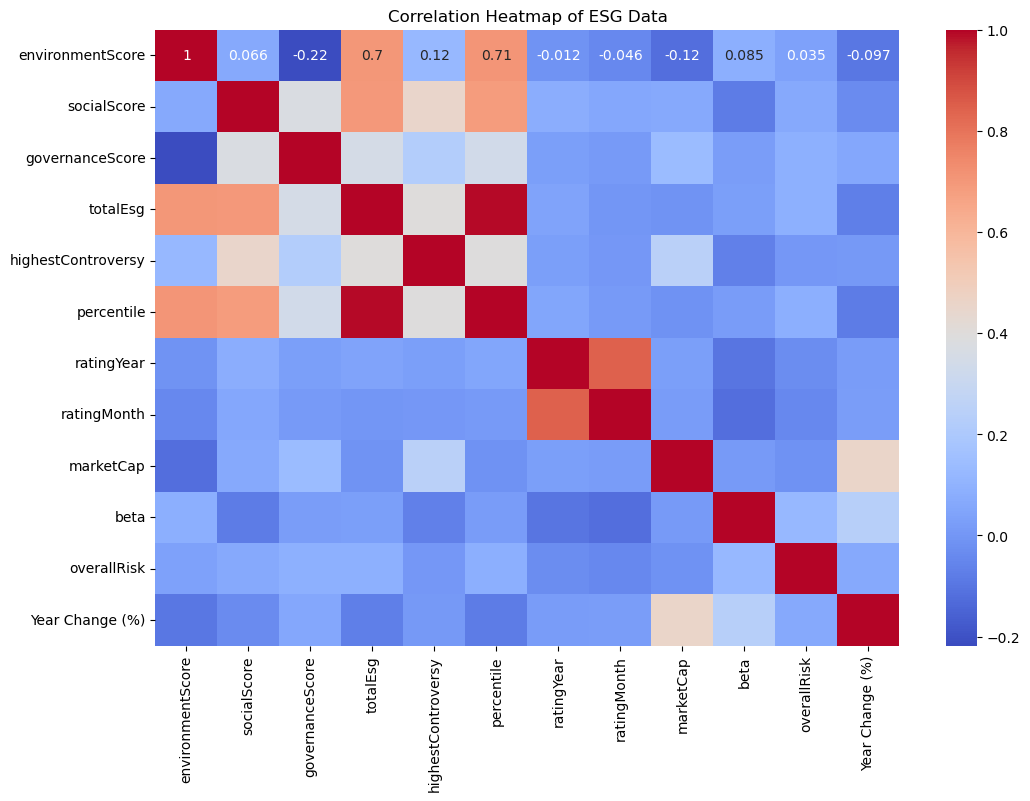

In [9]:
numeric_df = df_esg.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of ESG Data')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Keep only numeric columns for training
X = df_esg.drop(columns=['Year Change (%)', 'Symbol', 'Full Name', 'GICS Sector', 'GICS Sub-Industry'])
X = X.select_dtypes(include=['number'])  # ensures only numeric columns
y = df_esg['Year Change (%)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 5507.18
R-squared: 0.2669


In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred) 
print("R-Squared:", r2)

MSE: 6294.807985852525
R-Squared: 0.1620286581976197


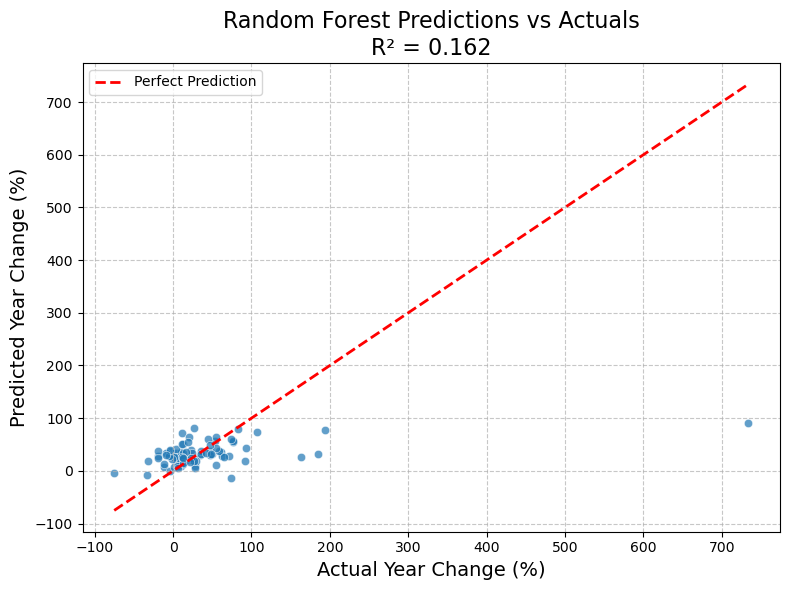

In [17]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', linewidth=2, label="Perfect Prediction")

plt.title(f"Random Forest Predictions vs Actuals\nR² = {r2:.3f}", fontsize=16)
plt.xlabel("Actual Year Change (%)", fontsize=14)
plt.ylabel("Predicted Year Change (%)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()